# Data Science for Design 2021 Clevercogs Entertainment

Job Description:

1. I will mainly analyze the data in CustomerMedicalConditions04Nov21.xlsx and CCDate2018-2021.xlsx, and simply sort out the data in User2021.

2. Furthermore, my group notes that the British blockade policy has been phased. Policies also differ at different stages. So we thought we might be able to find new information. Therefore, our group divided the data in the form 2018-2021 according to the pre -epidemic and different lockdown phases. I was mainly responsible for data analysis during the lockdown period from July 4th to November 5th. Therefore, I need to analyze the characteristics of the data from July 4th to November 5th separately. In this way, I can compare the results with the team members who have analyzed the data of other periods and dig out the possible differences and information.


In [18]:
#Deploy the environment and import the analysis package and data
import os    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings

In [19]:
style.use('seaborn')
warnings.filterwarnings('ignore')

# Data Consolidation

Data cleaning
1. First verify whether the data comes from the user through the ROLE column.
2. Delete data under the age of 18 and data with a null date of birth. Because these data come from public machines.
3. Delete the data whose ExternalID is null, because I will use ExternalID as a connection to merge CCDate2018-2021.CSV and CustomerMedicalConditions04Nov21.CSV



In [74]:
import csv
sns.set()


def get_data():
    df1 = pd.read_csv('CCDate2018-2021.csv')
    df1 = df1[df1['Role'] == 'User']

    df2 = pd.read_csv('CustomerMedicalConditions04Nov21.csv')
    df2 = df2[df2['Age'] >= 18]  # 过滤18岁以下人群
    df2.dropna(subset=['DateOfBirth'], inplace=True)
    print(df2)

    column1 = df1.columns
    column2 = df2.columns
    print(list(column1))
    print(list(column2))

    df1.dropna(subset=['ExternalID'], inplace=True)  # 在原始数据帧上“就地”（inplace=True）执行，下同
    df2.dropna(subset=['External ID'], inplace=True)
    df2['External ID'] = df2['External ID'].astype(str)
    f = open('new_data.csv', 'w', newline='', encoding='utf-8')
    csv_writer = csv.writer(f)
    header = list(column1) + list(column2)
    csv_writer.writerow(header)
    for row in df2.values:
        id = row[0]
        if id.replace(' ', '') != '':
            id = int(id)
            data = df1[df1['ExternalID'] == id]
            if data.values.__len__() == 0:  # 跳过空值
                continue

            for item in data.values:
                # item = np.array(item)
                # print(list(item), list(row))
                csv_writer.writerow(list(item) + (list(row)))

    f.close()

## Discribe

The following command line is a description of the data used. This includes issues such as complexity and data type.
The project provides three tables and the general type of these three are tabular. These data are connected to other data using External ID.

In [75]:
total_data = pd.read_csv('./new_data.csv')
total_data

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,3/12/18 6:28 AM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Mahjong,Internet,NaN,http://www.freegames.ws/games/boardgames/mahjo...,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1,3/12/18 6:28 AM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Single Player Games,Category,NaN,NaN,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
2,3/12/18 6:28 AM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Play Games,Category,NaN,NaN,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
3,3/12/18 6:28 AM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Entertainment,Category,NaN,NaN,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
4,3/11/18 5:58 PM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Information,Category,NaN,NaN,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475523,11/28/19 6:28 PM,EBD8FE21-95F8-45EC-98BC-495220E7203F,9594.0,User,Aberdeen C@H,Entertainment,Category,NaN,NaN,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
475524,11/28/19 6:28 PM,EBD8FE21-95F8-45EC-98BC-495220E7203F,9594.0,User,Aberdeen C@H,Multiplayer Games,Category,NaN,NaN,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
475525,11/28/19 6:28 PM,EBD8FE21-95F8-45EC-98BC-495220E7203F,9594.0,User,Aberdeen C@H,Single Player Games,Category,NaN,NaN,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN
475526,11/28/19 6:28 PM,EBD8FE21-95F8-45EC-98BC-495220E7203F,9594.0,User,Aberdeen C@H,Play Games,Category,NaN,NaN,9594,4060,M,1948/10/8,73.0,Multiple Sclerosis ...,NaN


In [76]:
#Make a preliminary description of the data.
total_data.describe(include='all')

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
count,475528,475528,475528.000000,475528,466258,475528,475528,17027,229268,475528.000000,475528.000000,475528,475528,475528.000000,137983,368940
unique,206810,482,NaN,1,42,1248,9,18,1162,NaN,NaN,3,459,NaN,33,25
top,3/23/21 10:08 PM,112FA96F-1BD2-4673-BFE8-ADF5478493D3,NaN,User,St Leonards Court,Entertainment,Category,Flash,https://www.google.co.uk/,NaN,NaN,F,1955/11/25,NaN,Epilepsy ...,Cerebral Palsy
freq,107,60350,NaN,475528,119145,56372,229843,15708,25901,NaN,NaN,239621,60350,NaN,44602,114248
mean,NaN,NaN,6713.628468,NaN,NaN,NaN,NaN,NaN,NaN,6713.628468,2136.950426,NaN,NaN,60.676482,NaN,NaN
std,NaN,NaN,1658.579127,NaN,NaN,NaN,NaN,NaN,NaN,1658.579127,1415.718807,NaN,NaN,15.147703,NaN,NaN
min,NaN,NaN,4703.000000,NaN,NaN,NaN,NaN,NaN,NaN,4703.000000,0.000000,NaN,NaN,20.000000,NaN,NaN
25%,NaN,NaN,5408.000000,NaN,NaN,NaN,NaN,NaN,NaN,5408.000000,1343.000000,NaN,NaN,54.000000,NaN,NaN
50%,NaN,NaN,5542.000000,NaN,NaN,NaN,NaN,NaN,NaN,5542.000000,1425.000000,NaN,NaN,65.000000,NaN,NaN
75%,NaN,NaN,8643.000000,NaN,NaN,NaN,NaN,NaN,NaN,8643.000000,2541.000000,NaN,NaN,68.000000,NaN,NaN


In [77]:
#View basic information about ccDate2074-20511.xlsx
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475528 entries, 0 to 475527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 475528 non-null  object 
 1   VisitorID            475528 non-null  object 
 2   ExternalID           475528 non-null  float64
 3   Role                 475528 non-null  object 
 4   Location             466258 non-null  object 
 5   Link Title           475528 non-null  object 
 6   Link  Type           475528 non-null  object 
 7   ContentInfo          17027 non-null   object 
 8   URL                  229268 non-null  object 
 9   External ID          475528 non-null  int64  
 10  CleverCogsUserId     475528 non-null  int64  
 11  Gender               475528 non-null  object 
 12  DateOfBirth          475528 non-null  object 
 13  Age                  475528 non-null  float64
 14  StaffPlanConditions  137983 non-null  object 
 15  CareSysCondition 

In [78]:
#Check the ranks
total_data.shape

(475528, 16)

In [79]:
#Viewing data Types
total_data.dtypes

Time                    object
VisitorID               object
ExternalID             float64
Role                    object
Location                object
Link Title              object
Link  Type              object
ContentInfo             object
URL                     object
External ID              int64
CleverCogsUserId         int64
Gender                  object
DateOfBirth             object
Age                    float64
StaffPlanConditions     object
CareSysCondition        object
dtype: object

In [80]:
#Examine missing data to help develop subsequent analysis and cleanup ideas.
total_data.isnull().sum().sort_values(ascending=False)

ContentInfo            458501
StaffPlanConditions    337545
URL                    246260
CareSysCondition       106588
Location                 9270
Time                        0
VisitorID                   0
ExternalID                  0
Role                        0
Link Title                  0
Link  Type                  0
External ID                 0
CleverCogsUserId            0
Gender                      0
DateOfBirth                 0
Age                         0
dtype: int64

## Explore

### Data cleaning and processing

### Q1: Cluster analysis: Use age and Link Type as a reference to find user characteristics.

Data cleaning ideas:

In order to ensure the accuracy of the data, we need to consider the problem of duplicate data. Because the question we asked contains the exploration of age, then we need to think about a certain time and scope.

I selected 2021 years  for analysis. First, I found that users had a tendency to perform multiple operations per minute, and we needed to analyze and filter these repeated data. 


I use time as the standard, delete multiple repetitions at the same time and keep the last one. Because it helps to determine what function the user ultimately stays on when using this product. This screening can more accurately determine which features are most attractive to users to stay and use.
But at the same time, I added a restriction on the visitorID column, because although the probability is very small, there may be two users operating the system at the same time, so only using the similarity in the time column to determine the result is likely to be inaccurate.

In [81]:
def figures():
    # Read the data
    df = pd.read_csv('new_data.csv')
    # Remove the duplicate by Time and VisitorID, and keep the last row
    df.drop_duplicates(subset=['Time', 'VisitorID'], keep='last', inplace=False)
    # Organize time and year
    df['Time'] = df['Time'].apply(lambda x: str(x).split('/')[-1][:2])
    # Use only 21 years of data
    df = df[df['Time'] == '21']
    # Plot the number distribution of ages (boxplot)
    plt.figure(figsize=(10,8))
    sns.boxplot(df['Age'])
    plt.title('Age box diagram')
    plt.show()

    # According to the box chart, most people are between 50 and 70 years old
    df = df[(df['Age'] > 50) | (df['Age'] < 70)]
    # Gets the number of different Link types in the current age group
    plt.figure(figsize=(10,8))
    data = df.groupby('Link  Type')['Age'].count()
    sns.barplot(data.index, data.values)  # Draw a bar chart
    plt.title('Distribution of Link Type use among 50-70 year olds')
    plt.xlabel('Link Type')
    plt.ylabel('number')
    plt.show()


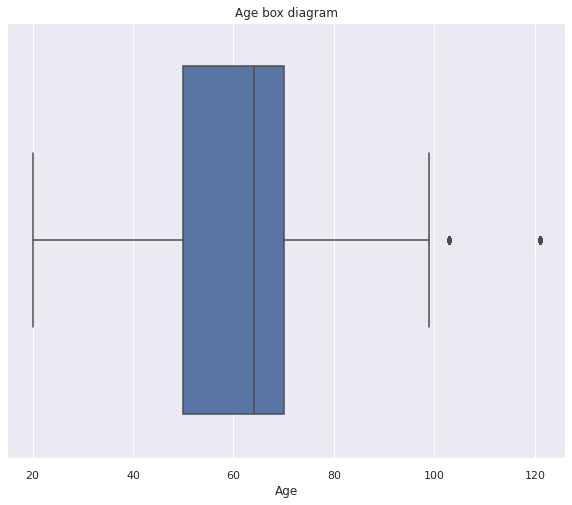

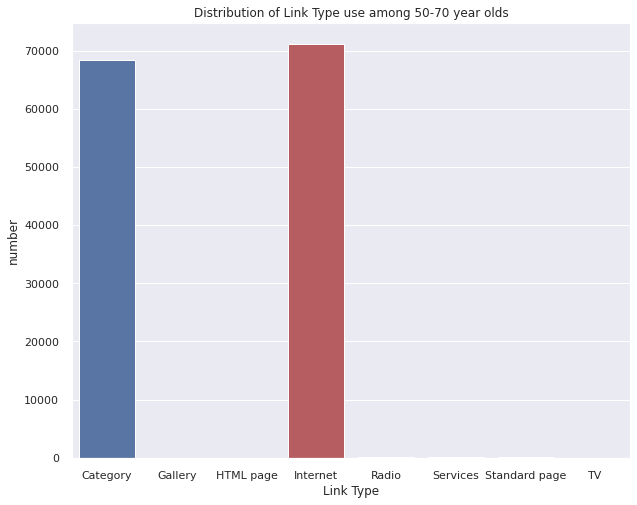

In [82]:
figures()

## Q1 Reflect and Hypothesise 

Hypothesise: 

According to the Boxplot, the number of users between the ages of 50 and 70 is the largest. According to this standard, I analyzed the function usage of these users. As the barplot Shows, It can be seen that there is not much difference between the usage of internet and category, and it is likely to be the module most used by users.

Follow-up tests:

First of all, we can continue to explore what other similar characteristics the user groups between the ages of 50 and 70 have in other columns based on this idea. We can also explore and compare the characteristics of users in 18-20 years in our future work. In addition, we can also deduce more detailed similarities based on the relationship between the columns. For example, use the two columns of link title and URL to explore websites that users frequently browse on the Internet.


## Q2: Data distribution of different usercondition

Data cleansing analysis:


In the combined table, the physical health status of the elderly is the same, so there are multiple meaningless counts. First, I need to clear duplicates.

In [83]:
#Delete the duplicate value based on ExternalID
data_cond =total_data.drop_duplicates(subset=['ExternalID','ExternalID'], keep='last', inplace=False)
data_cond

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
115,1/13/18 9:45 AM,A9BB1AED-1CAF-4FA4-8FB8-DE08119C37B8,4703.0,User,Menzieshill,Information,Category,NaN,NaN,4703,685,F,1965/7/4,56.0,NaN,Spina Bifida
1508,1/2/18 4:10 AM,7FFD9343-AF3D-4ADF-9C6C-9DEF43C1C593,4707.0,User,Menzieshill,Entertainment,Category,NaN,NaN,4707,1159,F,1982/9/18,39.0,NaN,Brain Injury
1830,1/5/18 11:53 AM,520F8D22-6B79-4B8E-A355-EE2F6DE7A0DB,4711.0,User,Menzieshill C@H,Information,Category,NaN,NaN,4711,765,F,1955/6/25,66.0,NaN,Cerebral Palsy
2015,1/25/18 7:11 PM,B80A28AE-2181-4877-8F7C-9D79AC758469,4713.0,User,North Housing,Information,Category,NaN,NaN,4713,683,F,1960/5/28,61.0,NaN,Epilepsy
2047,8/13/19 1:43 PM,7B94E895-E53C-436C-AE33-B929A89C8562,4732.0,User,Charleston C@H,My Interests,Category,NaN,NaN,4732,828,F,1958/2/27,63.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474700,9/5/21 8:00 PM,7AD11E1D-AC88-4E6F-801E-75942271BCE7,9474.0,User,South Ayrshire C@H,Entertainment,Category,NaN,NaN,9474,5589,U,1974/9/26,47.0,NaN,NaN
474885,9/2/21 3:53 PM,A932B17B-643A-4EA6-B848-05FBC210A092,9476.0,User,Responder Service,Communication,Category,NaN,NaN,9476,5591,M,1967/6/5,54.0,NaN,Mental Health Issues
474941,10/10/21 6:56 AM,8B5B722A-7DFB-422B-90B0-48B6BF1DC8E8,9567.0,User,Responder Service,Entertainment,Category,NaN,NaN,9567,5630,F,1970/5/16,51.0,NaN,Mental Health Issues
474959,10/23/21 2:46 PM,EB0567CB-A7CC-4FE5-8A17-3A485D38DB7C,9573.0,User,Responder Service,Entertainment,Category,NaN,NaN,9573,5638,M,1976/2/29,45.0,NaN,Learning Difficulties


In [84]:
# Collect statistics about users' physical conditions
data_cond1 = data_cond['CareSysCondition'].value_counts().reset_index()
data_cond1.columns = ['CareSysCondition','User_Number']
data_cond1

,CareSysCondition,User_Number
0,Elderly Care/Support,75
1,Mental Health Issues,66
2,Cerebral Palsy,32
3,Learning Difficulties,26
4,Stroke,20
5,Dementia,19
6,Brain Injury,19
7,Multiple Sclerosis,16
8,Lifelong Mobility Issues,14
9,COPD,13


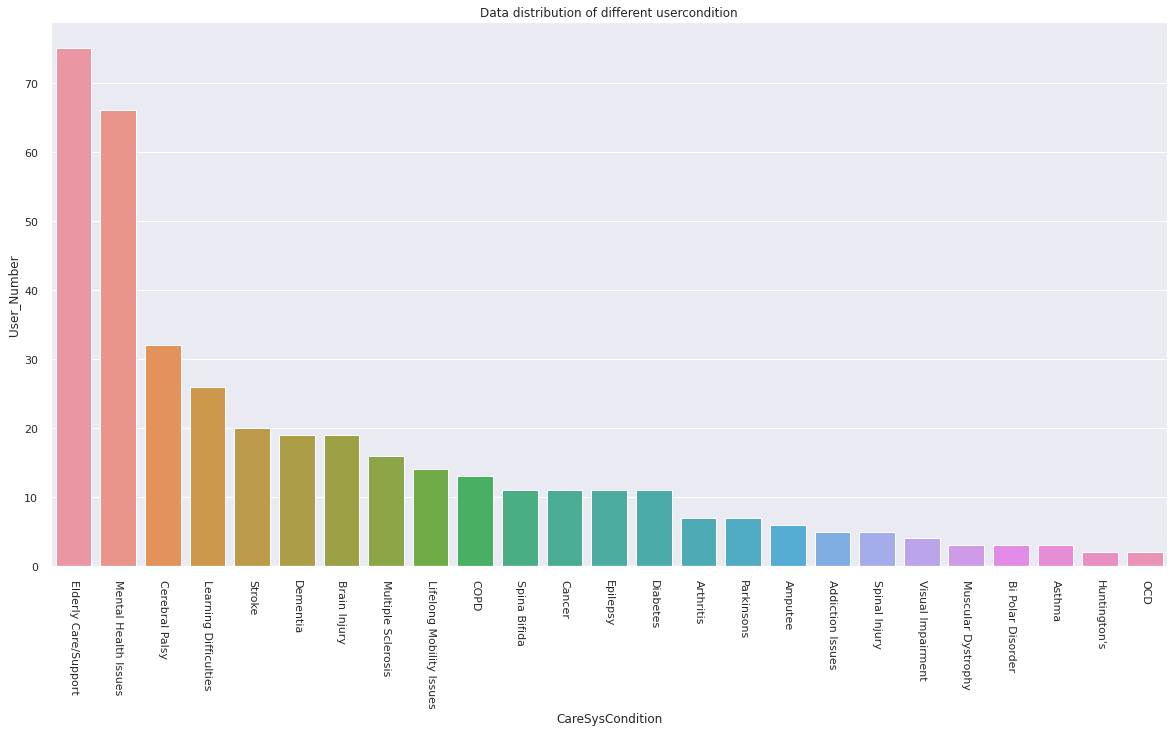

In [85]:
#Visualization of user physical condition
plt.figure(figsize=(20,10))
sns.barplot(x='CareSysCondition',y='User_Number',data=data_cond1)
plt.title('Data distribution of different usercondition')
plt.xticks(rotation=270)
plt.show()

### Q2 Data interpretation

Older people face many health problems. Among them, older people generally need care and support. Secondly, a significant number of users also have mental health problems.

## Q3: Analyze the distribution state between age and the user who needs care

In [86]:
#Only cases requiring elderly care/support are retained
data_care = data_cond[data_cond['CareSysCondition'] == 'Elderly Care/Support']
data_care

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL,External ID,CleverCogsUserId,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
42974,6/27/19 1:51 PM,E4A6099E-9AEC-45BB-B162-075D64B81C77,4772.0,User,Douglas & B/Ferry C@H,Information,Category,NaN,NaN,4772,1129,M,1935/4/20,86.0,NaN,Elderly Care/Support
55324,6/21/19 2:08 PM,C756C396-B060-4150-A719-CAA2E20BF4B4,5168.0,User,Douglas & B/Ferry C@H,Entertainment,Category,NaN,NaN,5168,1176,M,1937/12/13,84.0,NaN,Elderly Care/Support
55386,6/27/19 2:59 PM,E74CCA46-6668-4395-B3DA-03BAD14A3FBC,5180.0,User,Douglas & B/Ferry C@H,My Interests,Category,NaN,NaN,5180,1202,F,1936/10/6,85.0,NaN,Elderly Care/Support
55395,12/20/18 11:22 AM,A72D933C-6051-4580-8E6C-DBABABF94495,5203.0,User,Edinburgh West LFC C@H,Entertainment,Category,NaN,NaN,5203,1485,F,1936/11/19,85.0,NaN,Elderly Care/Support
86260,1/1/18 3:09 AM,89157E84-DD4E-4E08-927D-3038BB07B2C4,5207.0,User,Edinburgh West LFC C@H,My Interests,Category,NaN,NaN,5207,1339,F,1953/11/26,68.0,NaN,Elderly Care/Support
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466812,6/14/21 4:05 PM,2A29B560-82AD-4AE2-BC7A-522533289031,9191.0,User,Aberdeen C@H,My Care,Category,NaN,NaN,9191,5231,F,1936/4/4,85.0,NaN,Elderly Care/Support
467023,5/17/21 2:33 PM,06354360-DA84-4330-BFED-EFB6406D69E3,9192.0,User,Douglas & B/Ferry C@H,My Care,Category,NaN,NaN,9192,5232,M,1933/12/1,88.0,NaN,Elderly Care/Support
467032,7/20/21 3:13 PM,F06E1492-7902-430D-8726-5BB86E2E0FC6,9193.0,User,Douglas & B/Ferry C@H,My Neighbourhood,Category,NaN,NaN,9193,5233,F,1942/3/21,79.0,NaN,Elderly Care/Support
469729,7/21/21 5:34 PM,EC68DE21-E87E-4356-B950-8FB57A26F8F4,9218.0,User,Aberdeen C@H,My Care,Category,NaN,NaN,9218,5271,F,1918/10/3,103.0,NaN,Elderly Care/Support


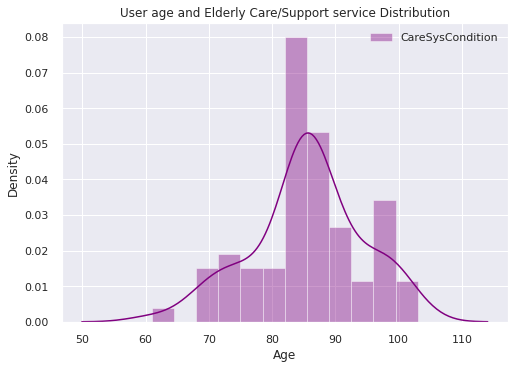

In [87]:
#Distribution mapping
sns.distplot(data_care['Age'],color = 'purple',label = 'CareSysCondition')#drawing. Data is coordinate value, color, label
plt.title('User age and Elderly Care/Support service Distribution')
plt.legend()

##  Q3 Reflect and Hypothesise

Hypothesise:

According to the health status of the second question, a large part of the user group needs care/support. Based on this result, I hope to explore the distribution relationship between the two data.

The shape of the data is close to a normal distribution. According to the ‘User age and Elderly Care/Support service Distribution’, users have a relatively high demand for care. And compared to other characteristics, this concentrated demand is distributed among users aged 80 to 90.

Follow-up tests:

I think the scale of data we currently have may be too small. Maybe we need more data to explore the distribution relationship.

# Group division: single table analysis

The project provides three tables and the general type of these three are tabular. These data are connected to other data using External ID. 


## 1. CCDate11m5-7m4.xlsx

This table mainly describes the basic information of users and their records of using the system.

11m5-7m4 here refer to the time period I need to deal with in the group. It can be simply understood that the following program is my questions and analysis results from July 4th to November 5th data sets.

## Discribe

The following command line is a description of the data used. This includes issues such as complexity and data type.

In [88]:
#Import data and view the scale and complex
data1 = pd.read_excel('./CCDate11m5-7m4.xlsx')
data1

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,2020-11-05 23:50:15.593,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Celtic FC,Internet,NaN,http://www.celticfc.net/mainindex
1,2020-11-05 23:48:15.713,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Celtic FC,Internet,NaN,http://www.celticfc.net/mainindex
2,2020-11-05 23:46:40.450,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Sky Football,Internet,NaN,https://www.skysports.com/football
3,2020-11-05 23:46:00.720,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,BBC Football,Internet,NaN,https://www.bbc.co.uk/sport/0/football/
4,2020-11-05 23:43:12.573,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,BBC Football,Internet,NaN,https://www.bbc.co.uk/sport/0/football/
...,...,...,...,...,...,...,...,...,...
61665,2020-07-04 00:12:56.747,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,YouTube,Internet,NaN,http://www.youtube.com
61666,2020-07-04 00:07:54.333,A6FF16F6-DA2C-4C76-8A2F-FFF5B37A06EF,8793.0,User,NaN,YouTube LIVE,Internet,NaN,https://www.youtube.com/channel/UC4R8DWoMoI7CA...
61667,2020-07-04 00:06:25.383,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,YouTube,Internet,NaN,http://www.youtube.com
61668,2020-07-04 00:05:56.530,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,BBC Formula 1,Internet,NaN,http://www.bbc.co.uk/sport/formula1


In [89]:
#Make a preliminary description of the data.
data1.describe(include='all')

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
count,61670,61670,45059.000000,61659,60759,61670,61670,1772,35383
unique,61670,332,NaN,3,35,753,7,13,687
top,2020-11-05 23:50:15.593000,112FA96F-1BD2-4673-BFE8-ADF5478493D3,NaN,User,St Leonards Court,Card Matching Games,Internet,-1|329|10|Comfort Break|1|,http://mypuzzle.org/find-the-pair
freq,1,12451,NaN,61565,15714,8680,31955,1324,8680
first,2020-07-04 00:04:00.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-11-05 23:50:15.593000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6908.662309,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1764.152686,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,998.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5535.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
#View basic information about ccDate2074-20511.xlsx
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61670 entries, 0 to 61669
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         61670 non-null  datetime64[ns]
 1   VisitorID    61670 non-null  object        
 2   ExternalID   45059 non-null  float64       
 3   Role         61659 non-null  object        
 4   Location     60759 non-null  object        
 5   Link Title   61670 non-null  object        
 6   Link  Type   61670 non-null  object        
 7   ContentInfo  1772 non-null   object        
 8   URL          35383 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 4.2+ MB


In [91]:
#Check the ranks
data1.shape

(61670, 9)

In [92]:
#Viewing data Types
data1.dtypes

Time           datetime64[ns]
VisitorID              object
ExternalID            float64
Role                   object
Location               object
Link Title             object
Link  Type             object
ContentInfo            object
URL                    object
dtype: object

In [93]:
#Examine missing data to help develop subsequent analysis and cleanup ideas.
data1.isnull().sum().sort_values(ascending=False)

ContentInfo    59898
URL            26287
ExternalID     16611
Location         911
Role              11
Time               0
VisitorID          0
Link Title         0
Link  Type         0
dtype: int64

## Explore 

### Data import and clean

What to clean up:
1. First of all, according to the requirements of the project, we only need to pay attention to the use of users. However, when we checked the Excel table, We found that the people who used the system had many identities. Like staff. So we carried out data cleaning.

2. Next, delete the data row with ExternalID empty.



In [94]:
data1_ = data1[data1['Role'] == 'User']#Only user data is retained
data1_.dropna(subset=['ExternalID'],inplace=True)
data1_.index = range(data1_.shape[0])
data1_

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
0,2020-11-05 23:50:15.593,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Celtic FC,Internet,NaN,http://www.celticfc.net/mainindex
1,2020-11-05 23:48:15.713,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Celtic FC,Internet,NaN,http://www.celticfc.net/mainindex
2,2020-11-05 23:46:40.450,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,Sky Football,Internet,NaN,https://www.skysports.com/football
3,2020-11-05 23:46:00.720,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,BBC Football,Internet,NaN,https://www.bbc.co.uk/sport/0/football/
4,2020-11-05 23:43:12.573,101E7014-899E-4308-BA12-F417F6FF7A87,9137.0,User,Glasgow West C@H,BBC Football,Internet,NaN,https://www.bbc.co.uk/sport/0/football/
...,...,...,...,...,...,...,...,...,...
45047,2020-07-04 00:12:56.747,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,YouTube,Internet,NaN,http://www.youtube.com
45048,2020-07-04 00:07:54.333,A6FF16F6-DA2C-4C76-8A2F-FFF5B37A06EF,8793.0,User,NaN,YouTube LIVE,Internet,NaN,https://www.youtube.com/channel/UC4R8DWoMoI7CA...
45049,2020-07-04 00:06:25.383,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,YouTube,Internet,NaN,http://www.youtube.com
45050,2020-07-04 00:05:56.530,0EEDEE08-F981-489A-9AB1-67FFFAA76C8C,9533.0,User,Belses Gardens,BBC Formula 1,Internet,NaN,http://www.bbc.co.uk/sport/formula1


## Q1: Does the frequency of user use of the function change from month to month?

Split data by month. Discover what features users are more likely to use in the system between July and November, and what is the difference in usage between those months

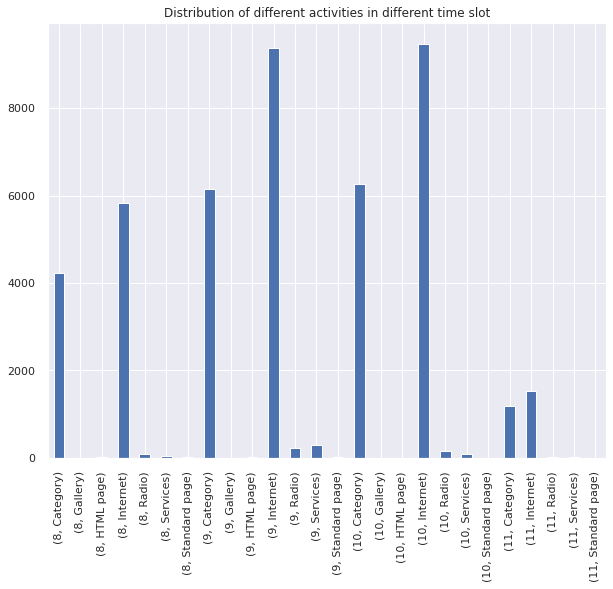

In [95]:
data1_['Time'] = data1['Time'].dt.month
data1_.groupby(['Time','Link  Type']).count()['VisitorID'].plot(kind='bar',figsize=(10,8))
plt.xlabel('')
plt.title('Distribution of different activities in different time slot')
plt.show()

## Q1 Reflect and Hypothesise

Hypothesise:

Recall that in the data that was merged at the beginning, the analysis results showed that the frequency of use of the internnet and category functions was similar. However, during the period of lockdown, there was a big gap between internet usage and classification usage within a few months. Based on this, I speculate that during the epidemic, internet functions provide users with greater help.

Follow-up tests:

I mentioned that the United Kingdom also has a different policy during the lockdown period. In the subsequent data analysis, I will compare my results with the results of other team members, trying to find out more detailed connections and reasons for changes.

## Question 2: User address distribution (where is the largest? Where is the least? 

The same user may perform many operations, but they live in the same place.

In [96]:
#Clean up first.  
data1_['VisitorID']=data1_['VisitorID'].astype(str)
new_data= data1_.drop_duplicates(subset=['VisitorID'],keep='last',inplace=False)#The last line of the duplicate item was chosen in consideration of the possibility that older people might change addresses during this period
user_num= new_data.groupby('Location')['VisitorID'].count
new_data

,Time,VisitorID,ExternalID,Role,Location,Link Title,Link Type,ContentInfo,URL
1362,11,A2C42DB4-3607-490B-AD2C-11627794BFCD,8658.0,User,Responder Service,My Learning,Category,NaN,NaN
1536,11,62AD3017-69DD-4EC3-A257-F9BEBF971E35,8791.0,User,Test Building,Entertainment,Category,NaN,NaN
2663,11,27D8F9B0-76E9-4C0E-A005-78A0E2C347DC,8917.0,User,Responder Service,Entertainment,Category,NaN,NaN
3037,10,F764808B-1B9F-4E10-80D8-0C3E29BD2237,9024.0,User,69 Glamis Road,My Home,Category,NaN,NaN
3042,10,131EB7A1-E793-4857-AD2D-AA1DE23F775B,8906.0,User,Responder Service,Google,Internet,NaN,https://www.google.co.uk/
...,...,...,...,...,...,...,...,...,...
45025,8,AA454435-CF18-4E34-B50A-A9DEA3EFFF1E,5347.0,User,Broom Court,Radio Stations,Category,NaN,NaN
45027,8,BE0BBD31-93F4-44FE-82EC-24E68BEAD418,7901.0,User,Aberdeen C@H,My Interests,Category,NaN,NaN
45030,8,7925C5CE-A0B8-473D-BEFF-5D2D9C9C6FE6,5541.0,User,St Leonards Court,Entertainment,Category,NaN,NaN
45048,8,A6FF16F6-DA2C-4C76-8A2F-FFF5B37A06EF,8793.0,User,NaN,YouTube LIVE,Internet,NaN,https://www.youtube.com/channel/UC4R8DWoMoI7CA...


In [97]:
# user address distribution analysis
data_adr = new_data['Location'].value_counts().reset_index()
data_adr.columns = ['Address','User_Number']
data_adr

,Address,User_Number
0,Responder Service,43
1,Broom Court,14
2,Raeden Court,14
3,Aberdeen C@H,12
4,Menzieshill C@H,12
5,Glasgow West C@H,12
6,Charleston C@H,9
7,Belses Gardens,9
8,Edinburgh East Abbey C@H,8
9,67 Glamis Road,7


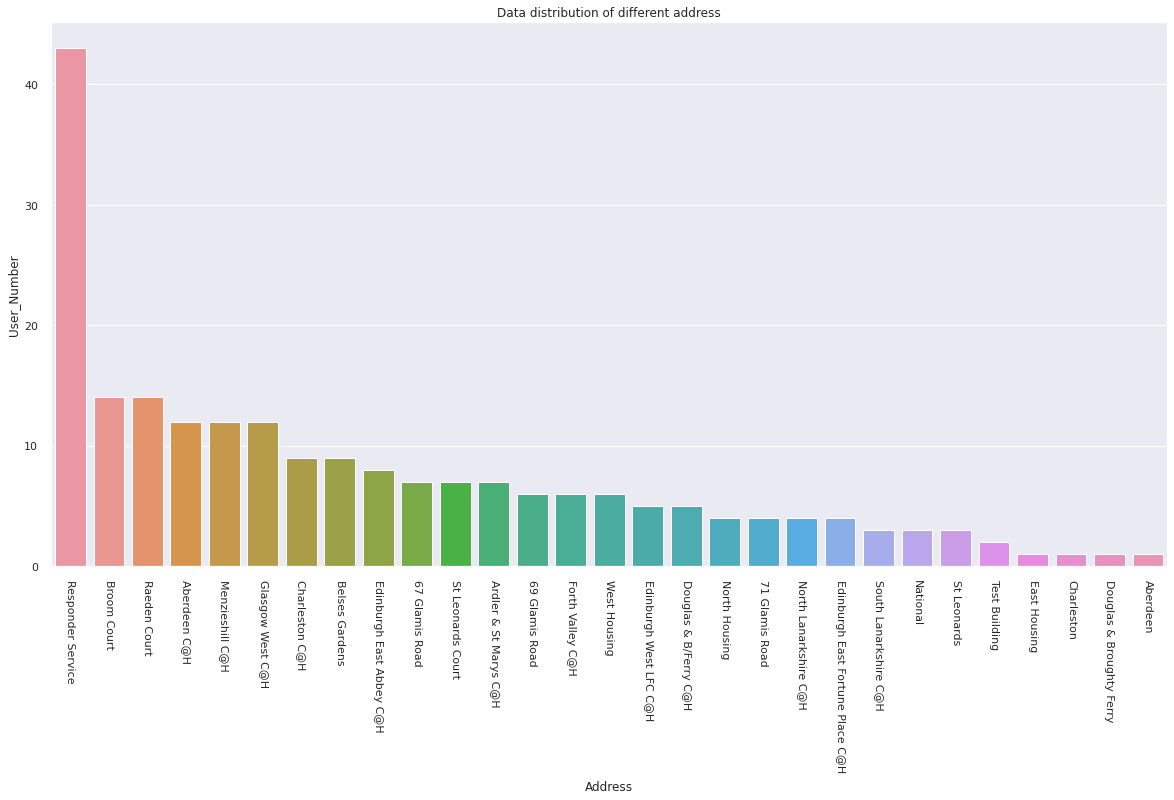

In [98]:
#Data visualization
plt.figure(figsize=(20,10))
sns.barplot(x='Address',y='User_Number',data=data_adr)
plt.title('Data distribution of different address')
plt.xticks(rotation=270)
plt.show()

## Q2: Reflect and Hypothesise

The sample users are 223. As this chart Shows, Responder Service had more number of users  from July 4th to November 5th.

Hypothesise:
Responder Service is based in Edinburgh and is able to provide round-the-clock care and support services. These users all live in their own homes. CleverCogs successfully helped Responder Service staff stay in touch with users during the pandemic. （This information comes from the official website. available at: https://www.blackwoodgroup.org.uk/support-worker-247-responder-service---edinburgh-btb-247). Judging by the number of users who use the service, between July to November, elderly people living at home are the largest user group. And CleverCogs' technology is also likely to successfully support the service of Responder Service.

Follow-up tests:
Can collate the number of people using the service from 2018 to 2021 and compare it to see if there was a significant increase between the pandemic and non-pandemic periods. Specific analysis can also be made of the common physical health characteristics of users who need this service.



## 3.Users2021.xlsx

## Discribe

The following command line is a description of the data used. This includes issues such as complexity and data type.

In [99]:
data3 = pd.read_excel('./Users2021.xlsx')
data3

,User ID,VisitorID,Birth date,Gender,Location
0,213,7447300C-B772-4779-9AC8-0A28B5BBBFF4,NaT,Male,NaN
1,298,F298F6B9-77E2-459D-96EE-F588FA2BC5B1,NaT,Male,NaN
2,314,5E896124-3F0E-4D01-915D-BAE9B3F1A39A,NaT,Male,NaN
3,370,E71C1EB8-6E61-4DB5-BE19-8E3AB8FBE95C,NaT,Male,Aberdeen Council
4,387,D7686862-D926-49CB-93CA-B8676CA2A91A,NaT,Male,NaN
...,...,...,...,...,...
3636,5671,5CEA1684-0922-49E7-859D-40A8DF20B4B6,2002-09-24,Female,National/North/Stirling Council/Forth Valley C@H
3637,5672,7AA63722-737A-4313-966A-320842DD26C9,NaT,Female,National
3638,5673,1A7A9E9B-F89A-444C-9817-C5E2C2D06BFA,NaT,Female,National
3639,5674,F60407F3-CEE0-485C-AECB-B0CFE4ECBCC8,2001-12-22,Female,National/EAST /Edinburgh City Council/Edinburg...


In [100]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3641 entries, 0 to 3640
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   User ID     3641 non-null   int64         
 1   VisitorID   3641 non-null   object        
 2   Birth date  1679 non-null   datetime64[ns]
 3   Gender      3641 non-null   object        
 4   Location    3024 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 142.4+ KB


In [101]:
data3.shape

(3641, 5)

In [102]:
data3.describe(include='all')

,User ID,VisitorID,Birth date,Gender,Location
count,3641.000000,3641,1679,3641,3024
unique,NaN,3641,1567,3,87
top,NaN,7447300C-B772-4779-9AC8-0A28B5BBBFF4,1900-05-25 00:00:00,Female,National/WEST /West Housing
freq,NaN,1,26,2383,220
first,NaN,NaN,1900-01-01 00:00:00,NaN,NaN
last,NaN,NaN,2021-09-21 00:00:00,NaN,NaN
mean,3076.406207,NaN,NaN,NaN,NaN
std,1606.575613,NaN,NaN,NaN,NaN
min,213.000000,NaN,NaN,NaN,NaN
25%,1690.000000,NaN,NaN,NaN,NaN
